In [1]:
# 合肥美食地图
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
data = pd.read_csv('items.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18837 entries, 0 to 18836
Data columns (total 8 columns):
IS_TYPE        18832 non-null object
IS_NAME        18837 non-null object
COORDINATE     18837 non-null object
XZQHSZ_DM      18837 non-null object
ADDRESS        18837 non-null object
TAG            18757 non-null object
RATING         12733 non-null float64
COMMENT_NUM    11663 non-null float64
dtypes: float64(2), object(6)
memory usage: 1.1+ MB


In [2]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4364 entries, 0 to 18833
Data columns (total 8 columns):
IS_TYPE        4363 non-null object
IS_NAME        4364 non-null object
COORDINATE     4364 non-null object
XZQHSZ_DM      4364 non-null object
ADDRESS        4364 non-null object
TAG            4340 non-null object
RATING         2661 non-null float64
COMMENT_NUM    2429 non-null float64
dtypes: float64(2), object(6)
memory usage: 306.8+ KB


In [3]:
import numpy as np 
data1 = data[data['TAG'].apply(lambda x:True if x is not np.nan else False)]
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4340 entries, 0 to 18833
Data columns (total 8 columns):
IS_TYPE        4339 non-null object
IS_NAME        4340 non-null object
COORDINATE     4340 non-null object
XZQHSZ_DM      4340 non-null object
ADDRESS        4340 non-null object
TAG            4340 non-null object
RATING         2661 non-null float64
COMMENT_NUM    2429 non-null float64
dtypes: float64(2), object(6)
memory usage: 305.2+ KB


In [4]:
tags = pd.Series([tag.split(';')[-1] for tag in data1.TAG.values])
tags.value_counts()

中餐厅      2729
小吃快餐店    1050
其他        141
外国餐厅      126
蛋糕甜品店      99
咖啡厅        31
茶座         31
快捷酒店       25
农家院        17
美食         17
星级酒店       15
公司          9
酒吧          8
住宅区         6
商铺          6
市场          4
休闲广场        3
亲子教育        2
农林园艺        2
超市          2
文物古迹        2
路口          1
培训机构        1
科研机构        1
风景区         1
公检法机构       1
交通设施        1
家居建材        1
厂矿          1
度假村         1
停车场         1
各级政府        1
港口          1
美容          1
购物          1
游戏场所        1
dtype: int64

(<matplotlib.axes._subplots.AxesSubplot at 0x2950198>, 5.0    478
 3.5    351
 4.0    280
 4.5    192
 4.3    163
 4.4    134
 3.0    126
 4.2    119
 4.6    119
 4.7    116
 4.8     88
 4.1     85
 0.0     46
 3.9     44
 3.7     44
 3.8     43
 4.9     41
 3.6     26
 3.2     21
 3.3     18
 2.0     18
 1.0     16
 1.8     12
 2.3     10
 2.5     10
 2.2      8
 3.4      8
 2.4      7
 2.9      7
 1.4      6
 2.8      6
 3.1      5
 1.3      4
 1.6      3
 2.1      2
 2.7      2
 1.7      1
 2.6      1
 1.9      1
 Name: RATING, dtype: int64)

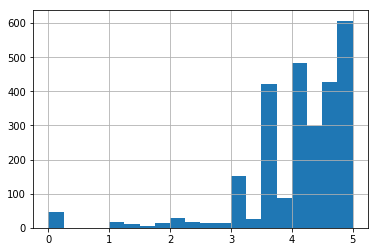

In [5]:
# 评分
data2 = data[data['RATING'].apply(lambda x:True if x is not np.nan else False)]
data2.RATING.hist(bins=20),data2.RATING.value_counts()

In [6]:
data3 = data[data['RATING']==5.0]
tags = pd.Series([tag.split(';')[-1] for tag in data3.TAG.values])
tags.value_counts()

中餐厅      285
小吃快餐店    129
其他        20
蛋糕甜品店     13
外国餐厅       8
茶座         6
酒吧         3
农家院        3
快捷酒店       3
农林园艺       2
咖啡厅        2
美容         1
美食         1
港口         1
商铺         1
dtype: int64

In [8]:
# 评论数量超过两百且评分在4.5以上的店
nice_food = data[(data['COMMENT_NUM']==200.0)&(data['RATING']>=4.5)]
nice_food.XZQHSZ_DM.value_counts()

蜀山区    24
包河区    18
庐阳区    17
瑶海区     8
肥西县     2
长丰县     1
Name: XZQHSZ_DM, dtype: int64

In [9]:
nice_food

,IS_TYPE,IS_NAME,COORDINATE,XZQHSZ_DM,ADDRESS,TAG,RATING,COMMENT_NUM
2324,cater,金滏山烤肉美食中心(名邦广场店),"117.161135,31.718998",肥西县,其他上派镇巢湖路与站前路交汇处名邦购物广场3楼303-304,美食;外国餐厅,4.6,200.0
2363,cater,饮福尚,"117.161114,31.71902",肥西县,上派镇上派镇金寨路与站前路交口名邦广场2楼(名邦广场),美食;小吃快餐店,4.5,200.0
4996,cater,虹泥小厨(天柱路店),"117.205081,31.858515",蜀山区,高新区长江西路与天柱路交叉口向南200米,美食;中餐厅,4.5,200.0
5020,cater,味至上(蜀山店),"117.205042,31.858682",蜀山区,合肥高新区天柱路888号近长江西路,美食;中餐厅,4.6,200.0
5211,cater,汉斯特自助烤肉(港澳广场店),"117.214388,31.79737",蜀山区,经开区翡翠路与金炉路交口港澳广场苏宁电器北座二楼,美食;外国餐厅,4.5,200.0
5212,cater,傣妹火锅(港澳广场店),"117.215181,31.797355",蜀山区,合肥市蜀山区翡翠路188号港澳广场F3,美食;中餐厅,4.7,200.0
5235,cater,优乐自助餐厅,"117.214352,31.797391",蜀山区,安徽省合肥市蜀山区经开区翡翠路港澳广场D区中国银行2层,美食;外国餐厅,4.6,200.0
5271,cater,蜀王贵人香(中环店),"117.214565,31.787561",蜀山区,合肥市蜀山区繁华大道12167号中环购物中心F4,美食;中餐厅,4.5,200.0
5308,cater,韩风炭火烤肉(中环店),"117.214713,31.787793",蜀山区,安徽省合肥市蜀山区中环购物中心3楼-100/101,美食;其他,4.7,200.0
5332,cater,小尾羊·欢乐牧场时尚自助餐厅,"117.215049,31.796769",蜀山区,翡翠路与芙蓉路交叉口西北角沃尔玛4楼（安医二附院对面）,美食;外国餐厅,4.6,200.0
